In [1]:
import pandas as pd
import datetime
from datetime import datetime, date
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("incident_event_log.csv", sep=',', encoding='UTF-8')
df = df.iloc[0:10000]
df.shape

(10000, 36)

In [3]:
for column in df.columns:
    print(df[column].value_counts())
    print('\n')

INC0002129    36
INC0000990    28
INC0001471    26
INC0000820    26
INC0001451    26
              ..
INC0001927     2
INC0000269     2
INC0000604     2
INC0001119     2
INC0000587     2
Name: number, Length: 1446, dtype: int64


New                   2782
Active                2548
Awaiting User Info    1552
Resolved              1522
Closed                1454
Awaiting Problem       116
Awaiting Vendor         23
Awaiting Evidence        3
Name: incident_state, dtype: int64


True     8546
False    1454
Name: active, dtype: int64


0     5013
1     2309
2     1165
3      578
4      319
5      209
6      150
7       98
8       59
9       40
10      31
14       8
12       7
11       6
18       3
13       2
17       1
16       1
15       1
Name: reassignment_count, dtype: int64


0    9829
1     131
3      18
2      15
4       7
Name: reopen_count, dtype: int64


0      1441
1      1211
2      1145
3       969
4       788
       ... 
106       1
90        1
50        1
129       1
83   

In [4]:
df.nunique()

number                     1446
incident_state                8
active                        2
reassignment_count           19
reopen_count                  5
sys_mod_count                95
made_sla                      2
caller_id                   949
opened_by                    73
opened_at                  1165
sys_created_by               70
sys_created_at              837
sys_updated_by              191
sys_updated_at             5327
contact_type                  1
location                     98
category                     38
subcategory                 135
u_symptom                   176
cmdb_ci                      12
impact                        3
urgency                       3
priority                      4
assignment_group             64
assigned_to                 138
knowledge                     2
u_priority_confirmation       2
notify                        1
problem_id                   26
rfc                          31
vendor                        2
caused_b

In [5]:
#On retire les colonnes qui comportent trop de valeurs manquantes
total = len(df)
colToDrop = []
for elt in df.columns:
    count = 0
    for i in range(len(df[elt])):
        if(df[elt][i] == '?'):
            count += 1
    if (count/total*100>50):
        print(elt, "  ", count, "   ", count/total*100, "% valeurs manquantes")
        colToDrop.append(elt)
df.drop(columns=colToDrop, inplace= True)

cmdb_ci    9882     98.82 % valeurs manquantes
problem_id    9679     96.78999999999999 % valeurs manquantes
rfc    9794     97.94 % valeurs manquantes
vendor    9993     99.92999999999999 % valeurs manquantes
caused_by    9982     99.82 % valeurs manquantes


In [6]:
df.duplicated().value_counts() #Aucun doublon dans le dataset à retirer

False    10000
dtype: int64

In [7]:
listReplacers = ['INC', 'Caller ', 'Opened by ', 'Created by ', 'Updated by ', 'Location ', 'Category ', 'Subcategory ', 'Symptom ', 'Group ', 'Resolver ', 'code ', 'Resolved by ']
listColToReplace = ['number','caller_id', 'opened_by','sys_created_by', 'sys_updated_by', 'location','category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to', 'closed_code','resolved_by']
def StripCol(df, col, strToRemove):
    for i in range(len(df[col])):
        df[col][i] = df[col][i].strip(strToRemove)
    return df

In [8]:
i=0
for col in listColToReplace:
    df = StripCol(df, col, listReplacers[i])
    print(col, ' done')
    i+=1

C:\Users\Guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


number  done
caller_id  done
opened_by  done
sys_created_by  done
sys_updated_by  done
location  done
category  done
subcategory  done
u_symptom  done
assignment_group  done
assigned_to  done
closed_code  done
resolved_by  done


In [9]:
#Gestion des valeurs '?'
total = len(df)
listColATraiter = []
for elt in df.columns:
    count = 0
    for i in range(len(df[elt])):
        if(df[elt][i] == '?'):
            count += 1
    if(count != 0):
        print(elt, "  ", count, "  ", count/total*100, "% valeurs manquantes")
        listColATraiter.append(elt)
listColATraiter

opened_by    1377    13.77 % valeurs manquantes
sys_created_by    2739    27.389999999999997 % valeurs manquantes
sys_created_at    2739    27.389999999999997 % valeurs manquantes
location    33    0.33 % valeurs manquantes
category    53    0.53 % valeurs manquantes
subcategory    53    0.53 % valeurs manquantes
u_symptom    3112    31.119999999999997 % valeurs manquantes
assignment_group    359    3.5900000000000003 % valeurs manquantes
assigned_to    2753    27.529999999999998 % valeurs manquantes
closed_code    78    0.7799999999999999 % valeurs manquantes
resolved_at    75    0.75 % valeurs manquantes


['opened_by',
 'sys_created_by',
 'sys_created_at',
 'location',
 'category',
 'subcategory',
 'u_symptom',
 'assignment_group',
 'assigned_to',
 'closed_code',
 'resolved_at']

In [10]:
listColATraiter.remove('resolved_at')
listColATraiter.remove('sys_created_at')#On traite les dates séparément

In [11]:
for col in listColATraiter:
    df[col].replace('?', '0', inplace = True)

In [12]:
df['sys_created_at'].replace('?', np.nan, inplace = True)
df['sys_created_at'].ffill(inplace = True)
df['resolved_at'].replace('?', np.nan, inplace = True)
df['resolved_at'].ffill(inplace = True)

In [13]:
df['number']

0       0000045
1       0000045
2       0000045
3       0000045
4       0000047
         ...   
9995    0002319
9996    0002320
9997    0002320
9998    0002320
9999    0002320
Name: number, Length: 10000, dtype: object

In [14]:
#listDateTimeATraiter = ['sys_created_at', 'resolved_at']
#clean = lambda df,col,replacer : df[col][i].replace('?', '0', inplace = True)
#def ReplaceQuestionMarkDateTime(df, col): #Convertir les '?' par la valeur précédente dans la colonne
#    for i in range(len(df[column])):
#        if (df[column][i] == "?"):
#            df[column, i] = df[column][i-1]
#    return df
#for elt in listDateTimeATraiter:
#    df = ReplaceQuestionMarkDateTime(df, elt)

In [15]:
#def ReplaceQuestionMarkNumeric(df, col, replacer): #Convertir les '?'
#    for i in range(len(df[column])):
#        if ("?" == df[column][i]):
#            df[column][i] = replacer
#    return df

In [16]:
#i = 0
#for elt in listColATraiter:
#    df = ReplaceQuestionMarkNumeric(df, elt, listReplacers[i])
#    i+=1

In [17]:
#On vérifie qu'il n'y a plus aucun '?'
total = len(df)
listColATraiter = []
for elt in df.columns:
    count = 0
    for i in range(len(df[elt])):
        if(df[elt][i] == '?'):
            count += 1
    if(count != 0):
        print(elt, "  ", count, "  ", count/total*100, "% valeurs manquantes")
        listColATraiter.append(elt)

In [18]:
listToNumeric = ['number', 'caller_id', 'opened_by', 'sys_created_by', 'sys_updated_by','location', 'category', 'subcategory', 'u_symptom', 'assignment_group','assigned_to','closed_code','resolved_by']
#listCutLength = [3, 7, 10, 11, 11, 9, 9, 12, 8, 6, 9, 5, 12]

In [19]:
#def ToNumeric(df, col, cutLength):
#    for i in range(len(df[col])):
#        df[col][i] = df[col][i][cutLength:]
#    df[col] = pd.to_numeric(df[col])    
#    print(col, " converti en numerique")
#    return df

In [20]:
for elt in listToNumeric:
    df[elt] = pd.to_numeric(df[elt]) 

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
number                     10000 non-null int64
incident_state             10000 non-null object
active                     10000 non-null bool
reassignment_count         10000 non-null int64
reopen_count               10000 non-null int64
sys_mod_count              10000 non-null int64
made_sla                   10000 non-null bool
caller_id                  10000 non-null int64
opened_by                  10000 non-null int64
opened_at                  10000 non-null object
sys_created_by             10000 non-null int64
sys_created_at             10000 non-null object
sys_updated_by             10000 non-null int64
sys_updated_at             10000 non-null object
contact_type               10000 non-null object
location                   10000 non-null int64
category                   10000 non-null int64
subcategory                10000 non-null int64
u_symptom                

In [22]:
listToNumericLeft = ['impact', 'urgency', 'priority']
def ToNumericLeft(df, col, cutLength):
    for i in range(len(df[col])):
        df[col][i] = df[col][i][:cutLength]   
    df[col] = pd.to_numeric(df[col])    
    print(col, " converti en numerique")
    return df
for elt in listToNumericLeft:
    df = ToNumericLeft(df, elt, 1)

C:\Users\Guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


impact  converti en numerique
urgency  converti en numerique
priority  converti en numerique


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
number                     10000 non-null int64
incident_state             10000 non-null object
active                     10000 non-null bool
reassignment_count         10000 non-null int64
reopen_count               10000 non-null int64
sys_mod_count              10000 non-null int64
made_sla                   10000 non-null bool
caller_id                  10000 non-null int64
opened_by                  10000 non-null int64
opened_at                  10000 non-null object
sys_created_by             10000 non-null int64
sys_created_at             10000 non-null object
sys_updated_by             10000 non-null int64
sys_updated_at             10000 non-null object
contact_type               10000 non-null object
location                   10000 non-null int64
category                   10000 non-null int64
subcategory                10000 non-null int64
u_symptom                

In [24]:
#x = range(0,len(df["number"]))
#y = df["closed_at"]
#x = df["resolved_at"]
#plt.scatter(x, y)
#plt.xlabel('resolved_at')
#plt.ylabel('closed_at')
#
#plt.show()

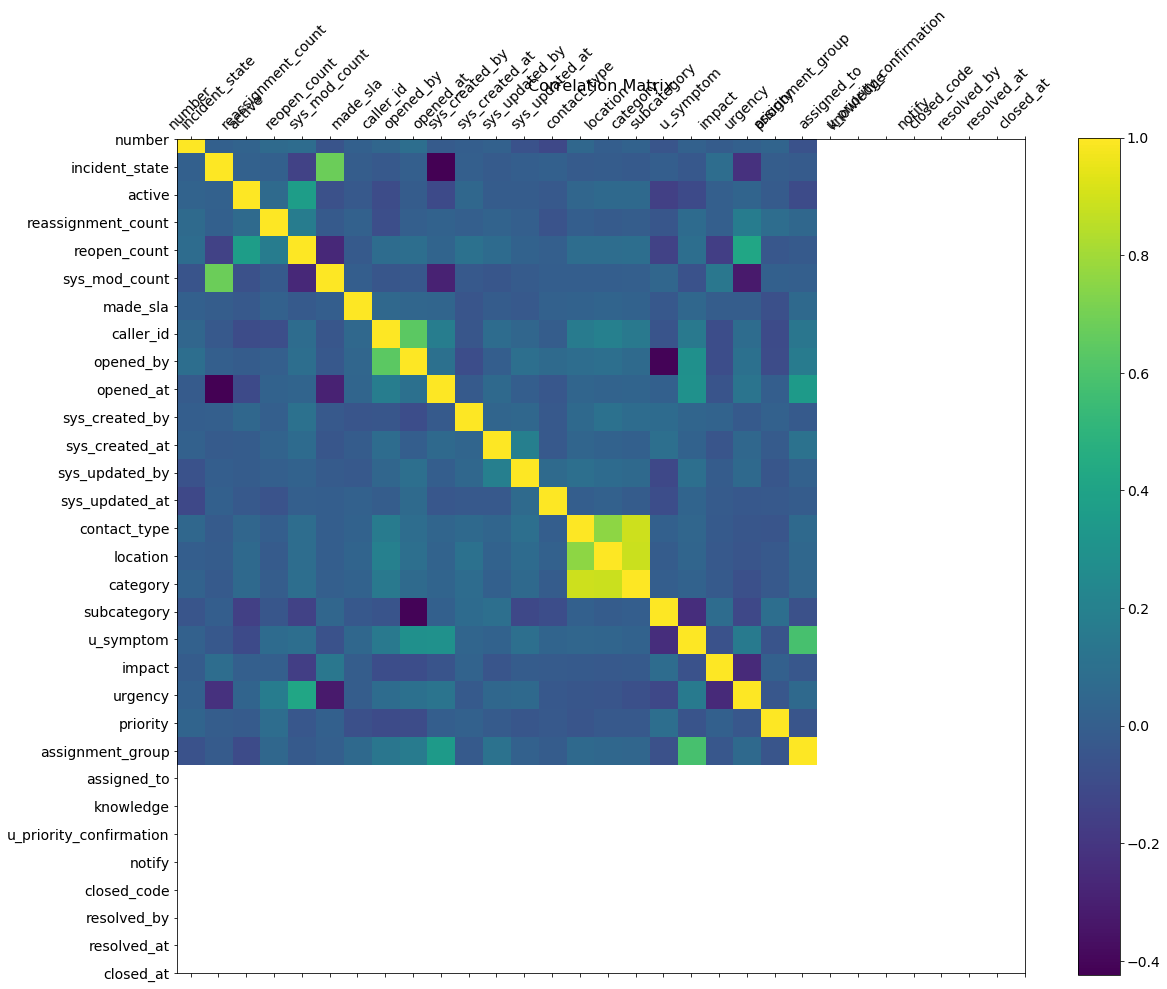

In [25]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [26]:
#on drop closed_at : variable très similaire à la variable à prédire mais est moins fiable que resolved_at
df.drop("closed_at",axis=1,inplace=True)

In [27]:
listToDateTime = ['opened_at', 'sys_updated_at', 'resolved_at', 'sys_created_at']
def ConvertToDateTime(dataframe, col):
    dataframe[col] = pd.to_datetime(dataframe[col], dayfirst = True)
    return dataframe
#Création de colonnes pour diviser les infos contenues dans les datetimes
def TimestampCol(df, col):
    newCol = []
    for i in range(len(df[col])):
        newCol.append(datetime.timestamp(df[col][i]))
    return newCol
def IsWeekend(df, col):
    newCol = []
    for i in range(len(df[col])):
        if(df[col][i].weekday()==5 or df[col][i].weekday() == 6):
            newCol.append(1)
        else:
            newCol.append(0)
    return newCol

In [28]:
for col in listToDateTime:
    df = ConvertToDateTime(df, col)
for col in listToDateTime:
    df[col + '_TS'] = TimestampCol(df, col)
listToDateTime.remove('resolved_at')
df.drop("resolved_at",axis=1,inplace=True)
for col in listToDateTime:
    df[col + '_weekend'] = IsWeekend(df, col)
for col in listToDateTime:
    df.drop(col,axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
number                     10000 non-null int64
incident_state             10000 non-null object
active                     10000 non-null bool
reassignment_count         10000 non-null int64
reopen_count               10000 non-null int64
sys_mod_count              10000 non-null int64
made_sla                   10000 non-null bool
caller_id                  10000 non-null int64
opened_by                  10000 non-null int64
sys_created_by             10000 non-null int64
sys_updated_by             10000 non-null int64
contact_type               10000 non-null object
location                   10000 non-null int64
category                   10000 non-null int64
subcategory                10000 non-null int64
u_symptom                  10000 non-null int64
impact                     10000 non-null int64
urgency                    10000 non-null int64
priority                   1

In [30]:
replacer = lambda x : x.replace(' ','_')
df['incident_state'] = df['incident_state'].apply(replacer)

In [31]:
df = pd.get_dummies(df)

In [32]:
#Supression des colonnes ne contenant que des valeurs nulles
df.drop("opened_at_weekend",axis=1,inplace=True)
df.drop("sys_created_at_weekend",axis=1,inplace=True)
df.drop('contact_type_Phone',axis=1,inplace=True)
df.drop('notify_Do Not Notify',axis=1,inplace=True)

In [33]:
df.columns

Index(['number', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by',
       'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom',
       'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to',
       'knowledge', 'u_priority_confirmation', 'closed_code', 'resolved_by',
       'opened_at_TS', 'sys_updated_at_TS', 'resolved_at_TS',
       'sys_created_at_TS', 'sys_updated_at_weekend', 'incident_state_Active',
       'incident_state_Awaiting_Evidence', 'incident_state_Awaiting_Problem',
       'incident_state_Awaiting_User_Info', 'incident_state_Awaiting_Vendor',
       'incident_state_Closed', 'incident_state_New',
       'incident_state_Resolved'],
      dtype='object')

In [34]:
df.shape

(10000, 36)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
number                               10000 non-null int64
active                               10000 non-null bool
reassignment_count                   10000 non-null int64
reopen_count                         10000 non-null int64
sys_mod_count                        10000 non-null int64
made_sla                             10000 non-null bool
caller_id                            10000 non-null int64
opened_by                            10000 non-null int64
sys_created_by                       10000 non-null int64
sys_updated_by                       10000 non-null int64
location                             10000 non-null int64
category                             10000 non-null int64
subcategory                          10000 non-null int64
u_symptom                            10000 non-null int64
impact                               10000 non-null int64
urgency                 

In [36]:
df.columns

Index(['number', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'caller_id', 'opened_by', 'sys_created_by',
       'sys_updated_by', 'location', 'category', 'subcategory', 'u_symptom',
       'impact', 'urgency', 'priority', 'assignment_group', 'assigned_to',
       'knowledge', 'u_priority_confirmation', 'closed_code', 'resolved_by',
       'opened_at_TS', 'sys_updated_at_TS', 'resolved_at_TS',
       'sys_created_at_TS', 'sys_updated_at_weekend', 'incident_state_Active',
       'incident_state_Awaiting_Evidence', 'incident_state_Awaiting_Problem',
       'incident_state_Awaiting_User_Info', 'incident_state_Awaiting_Vendor',
       'incident_state_Closed', 'incident_state_New',
       'incident_state_Resolved'],
      dtype='object')

In [37]:
df.to_csv("dataframe.csv")

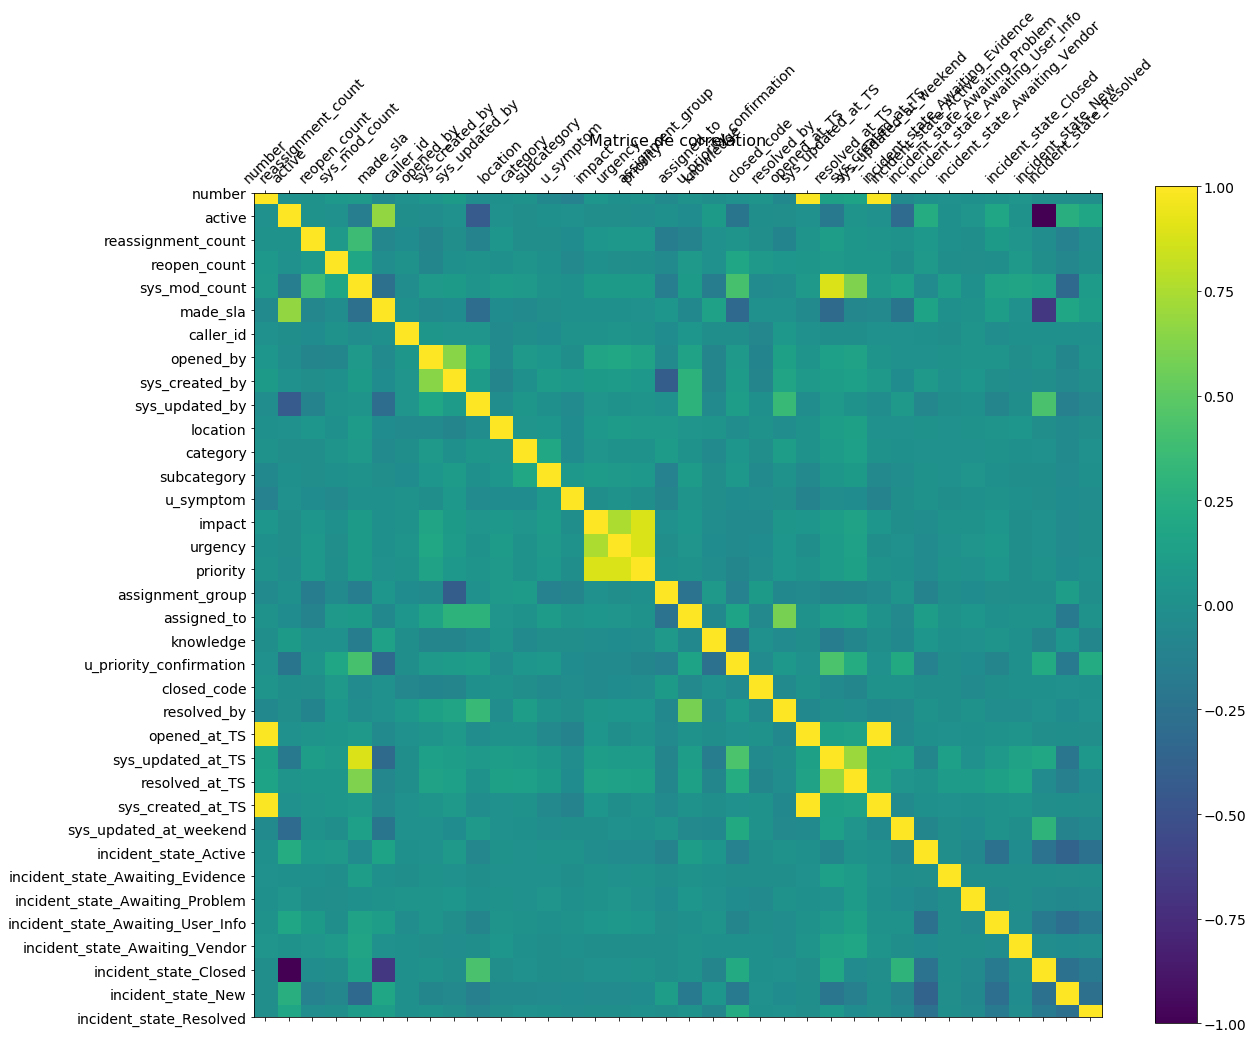

In [38]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matrice de correlation', fontsize=16);

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import seaborn as sns
from sklearn import svm
import numpy as np

In [40]:
#On prend resolved_at comme target, on utilise le timestamp

In [41]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=0)

X_train = train_set.drop(columns = ["resolved_at_TS"])
Y_train = train_set["resolved_at_TS"]

X_test = test_set.drop(columns = ["resolved_at_TS"])
Y_test = test_set["resolved_at_TS"]

In [42]:
#Si on veut des valeurs à la même échelle, pour une meilleure interprétabilité des coefficients
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
LR.coef_

array([ 9.42192481e+05, -2.74366197e+18, -1.48622435e+05,  8.51862084e+03,
        9.36900639e+04,  2.00053421e+05, -1.86535909e+04,  9.71748421e+04,
       -2.69602263e+03,  1.54705926e+05,  1.46557407e+05,  1.83405616e+05,
        1.01166918e+05, -5.25670758e+04,  1.28398600e+05,  2.45631450e+05,
       -1.51070913e+05, -2.00448379e+04,  2.71813564e+05,  1.41059384e+04,
        5.39295735e+03, -1.47364261e+05, -3.06053885e+05, -2.47883734e+05,
        2.16853917e+06, -5.18838550e+05,  7.51365662e+03,  7.37304210e+17,
        3.28582638e+16,  1.81914694e+17,  6.18807240e+17,  7.81498165e+16,
       -2.14568006e+18,  7.61062795e+17,  6.08268621e+17])

In [46]:
LR.score(X_test, Y_test)

0.5777613627954873

In [47]:
LR.score(X_train, Y_train)

0.5661174452407789

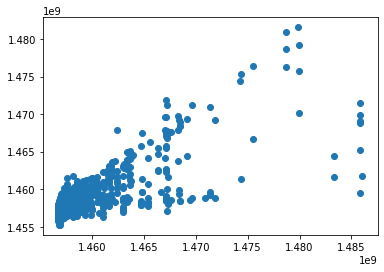

In [48]:
plt.scatter(x = Y_test, y=LR.predict(X_test))

In [49]:
predictions = LR.predict(X_test)
mse = mean_squared_error(Y_test, predictions)
mse

4378632445765.591

In [50]:
def get_score(algorithme, X_train, X_test, y_train, y_test, display_graph = False, display_options = True):
    if display_options:
        print("fitting :\n"+ str(algorithme))
        print("X_train:{} , X_test:{} ,  y_train:{} ,  y_test:{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))
    modele = algorithme.fit(X_train, y_train)
    score  = modele.score(X_test, y_test)
    if display_graph:
        plt.scatter(x=y_test, y=algorithme.predict(X_test)) ## Predictions against real values
    return score

In [51]:
def get_mse(algorithme, X_train, X_test, y_train, y_test):
    modele = algorithme.fit(X_train, y_train)
    predictions = modele.predict(X_test)
    mse = mean_squared_error(Y_test, predictions)
    return mse

In [52]:
def get_features(algorithme, X_train, X_test, y_train, y_test):
    modele = algorithme.fit(X_train, y_train)
    importances = modele.feature_importances_
    return importances

fitting :
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
X_train:(8000, 35) , X_test:(2000, 35) ,  y_train:(8000,) ,  y_test:(2000,)


0.5777613627954873

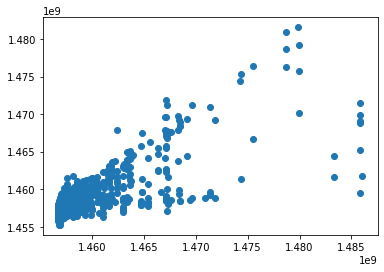

In [53]:
get_score(LinearRegression(), X_train, X_test, Y_train, Y_test, True)

fitting :
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
X_train:(8000, 35) , X_test:(2000, 35) ,  y_train:(8000,) ,  y_test:(2000,)


0.7445645822372483

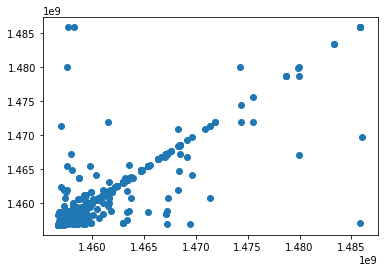

In [54]:
get_score(DecisionTreeRegressor(), X_train, X_test, Y_train, Y_test, True)

In [55]:
get_features(DecisionTreeRegressor(), X_train, X_test, Y_train, Y_test)

array([1.95029650e-02, 4.47302006e-03, 1.66156277e-03, 1.16343311e-03,
       9.61878118e-03, 2.58370350e-10, 2.36200654e-02, 1.91864866e-02,
       3.59578009e-03, 8.49252965e-03, 3.67771516e-02, 9.46623670e-03,
       8.71310963e-02, 1.16974864e-02, 9.98433244e-04, 4.54174054e-04,
       2.08746567e-03, 1.23118614e-02, 2.22312106e-02, 3.76201492e-11,
       5.58841590e-03, 2.24915303e-02, 1.12848145e-01, 1.80295987e-02,
       5.35984830e-01, 1.61947977e-02, 1.28005637e-05, 4.87507573e-03,
       0.00000000e+00, 3.04218225e-03, 2.46698123e-03, 0.00000000e+00,
       8.89984396e-05, 2.84177646e-03, 1.06512842e-03])

fitting :
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
X_train:(8000, 35) , X_test:(2000, 35) ,  y_train:(8000,) ,  y_test:(2000,)


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8889886660104784

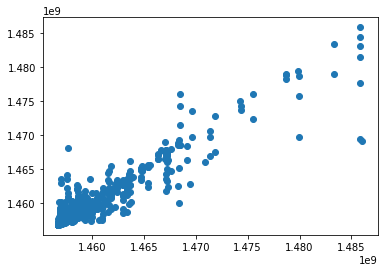

In [56]:
get_score(RandomForestRegressor(), X_train, X_test, Y_train, Y_test, True)

In [57]:
features = get_features(RandomForestRegressor(), X_train, X_test, Y_train, Y_test)

C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [58]:
dfx = df.copy()
dfx.drop("resolved_at_TS",axis=1,inplace=True)

In [59]:
len(df.columns)

36

In [60]:
feature_imp = pd.DataFrame({'col':dfx.columns, 'importance':RandomForestRegressor.feature_importances_})
#feature_imp = feature_imp.sort_values('importance', ascending = False)

fitting :
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators='warn',
                    n_jobs=None, oob_score=False, random_state=None, verbose=0,
                    warm_start=False)
X_train:(8000, 35) , X_test:(2000, 35) ,  y_train:(8000,) ,  y_test:(2000,)


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8911012291642278

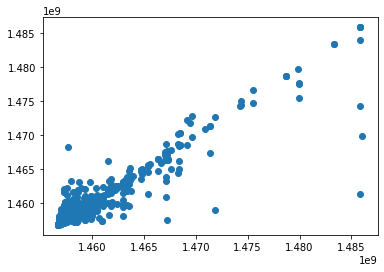

In [61]:
get_score(ExtraTreesRegressor(), X_train, X_test, Y_train, Y_test, True)

In [83]:
performances = []
listmse = []
algorithmes = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor, ExtraTreesRegressor]
for algo in algorithmes:
    performances.append(get_score(algo(), X_train, X_test, Y_train, Y_test, display_options = False))
    listmse.append(get_mse(algo(), X_train, X_test, Y_train, Y_test))

C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [84]:
performances

[0.5777613627954873, 0.7401275086289334, 0.882139182144601, 0.8799689569230307]

In [85]:
listmse

[4378632445765.591, 2795798390340.0, 984723087397.639, 1260720776646.561]

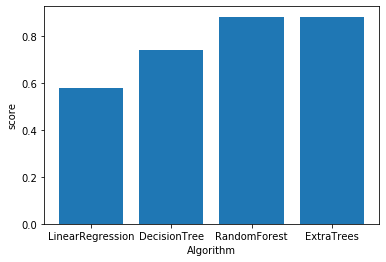

In [86]:
D = {'LinearRegression':performances[0], u'DecisionTree': performances[1], u'RandomForest':performances[2], u'ExtraTrees':performances[3]}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.ylabel('score')
plt.xlabel('Algorithm')
plt.show()

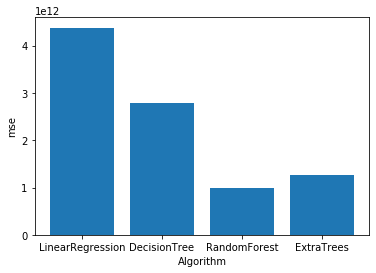

In [87]:
D = {'LinearRegression':listmse[0], u'DecisionTree': listmse[1], u'RandomForest':listmse[2], u'ExtraTrees':listmse[3]}

plt.bar(range(len(D)), D.values(), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.ylabel('mse')
plt.xlabel('Algorithm')
plt.show()

In [94]:
#Le randomforest possède le mse le plus faible
score= []
for i in range(1,75, 5):
    TestRF = RandomForestRegressor(n_estimators=i)
    score.append(get_score(TestRF, X_train, X_test, Y_train, Y_test, display_options=False))
    print(get_score(TestRF, X_train, X_test, Y_train, Y_test, display_options=False))

0.7549521950377368
0.8844852973471728
0.9012829946289977
0.903841466656177
0.8956073829499721
0.9068771538192975
0.9072726948385866
0.9110611997368975
0.9043039643853321
0.908136325383541
0.907276798416672
0.9123280687295942
0.9101727313666538
0.9072655827370519
0.9085074083335826


In [95]:
score

[0.832828004166734,
 0.8738518527572968,
 0.8964263427813889,
 0.8924551467209784,
 0.8950456302767485,
 0.8999395946756867,
 0.8960096246367059,
 0.9061658864502486,
 0.9058001179275068,
 0.9047282432993301,
 0.9123709479323778,
 0.9042719134910847,
 0.9148897847361267,
 0.9140228152634411,
 0.9091098243081875]

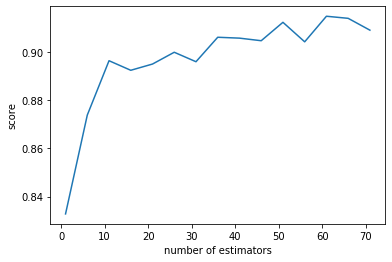

In [97]:
plt.plot(range(1,75, 5), score)
plt.ylabel('score')
plt.xlabel("number of estimators")
plt.show()

In [115]:
#Le randomforest possède le mse le plus faible
score= []
for i in range(1,75, 5):
    TestRF = RandomForestRegressor(max_depth=i)
    score.append(get_score(TestRF, X_train, X_test, Y_train, Y_test, display_options=False))
    print(get_score(TestRF, X_train, X_test, Y_train, Y_test, display_options=False))

C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4523085216863028
0.7449577292991076


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8372554857527679


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.882388504793646


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8982012241829629


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8905785374710966


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8647306244268407


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8988334857492142


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8944348888001369


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8863418188861169


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8770410736309937


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.899093386775405


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8750224352333157


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8839937173713222


C:\Users\Guillaume\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8986002869897561


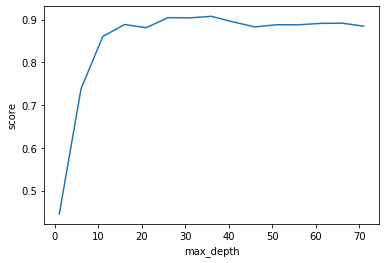

In [117]:
plt.plot(range(1,75, 5), score)
plt.ylabel('score')
plt.xlabel("max_depth")
plt.show()

In [98]:
gridParam = {
    'max_depth': range(1,100,10),
    'n_estimators'     : range(1,20, 2)
}

In [103]:
grid = GridSearchCV(estimator=RandomForestRegressor(), 
                                param_grid=gridParam, 
                                n_jobs=-1, cv=3, verbose=2)

In [104]:
grid_result = grid.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 183 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   47.9s finished


In [105]:
best_params = grid_result.best_params_

In [106]:
best_params

{'max_depth': 41, 'n_estimators': 17}

In [107]:
def rfr_model(X, y):
    #Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(30,100,5),
            'n_estimators': (1,30, 3),
        },
        cv=3, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print(best_params)
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    #K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10)

    return scores

In [108]:
rfr_scores = rfr_model(X_train, Y_train)

{'max_depth': 85, 'n_estimators': 30}


In [109]:
display(rfr_scores, rfr_scores.mean(), rfr_scores.std())

array([0.88941808, 0.93303982, 0.89859482, 0.90401062, 0.92243879,
       0.88081319, 0.84227234, 0.88849085, 0.70798188, 0.92015933])

0.8787219717805655

0.06189350206130528

In [111]:
def rfr_model(X, y):
    #Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(30,100,5),
            'n_estimators': (1,30, 3),
        },
        cv=5, verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print(best_params)
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
    return rfr

In [112]:
model = rfr_model(X_train,Y_train)

{'max_depth': 80, 'n_estimators': 30}


In [113]:
from sklearn.externals import joblib
path =  'model_randomForest.pkl'
joblib.dump(model, path)

['model_randomForest.pkl']

In [114]:
dict(df.iloc[0])

{'number': 45,
 'active': True,
 'reassignment_count': 0,
 'reopen_count': 0,
 'sys_mod_count': 0,
 'made_sla': True,
 'caller_id': 2403,
 'opened_by': 8,
 'sys_created_by': 6,
 'sys_updated_by': 21,
 'location': 143,
 'category': 55,
 'subcategory': 170,
 'u_symptom': 72,
 'impact': 2,
 'urgency': 2,
 'priority': 3,
 'assignment_group': 56,
 'assigned_to': 0,
 'knowledge': True,
 'u_priority_confirmation': False,
 'closed_code': 5,
 'resolved_by': 149,
 'opened_at_TS': 1456704960.0,
 'sys_updated_at_TS': 1456705380.0,
 'resolved_at_TS': 1456741740.0,
 'sys_created_at_TS': 1456705380.0,
 'sys_updated_at_weekend': 0,
 'incident_state_Active': 0,
 'incident_state_Awaiting_Evidence': 0,
 'incident_state_Awaiting_Problem': 0,
 'incident_state_Awaiting_User_Info': 0,
 'incident_state_Awaiting_Vendor': 0,
 'incident_state_Closed': 0,
 'incident_state_New': 1,
 'incident_state_Resolved': 0}